In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext

In [0]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql.functions import *

In [0]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [0]:
sc = SparkContext()
spark = SparkSession(sc)
sqlContext = SQLContext(sc)

In [8]:
import re

infile = "s3://srifinal007/devicestatus.txt"

d2 = sc.textFile(infile)
d3 = d2.map(lambda x: re.sub("[]\/|]", "," ,x).split(","))
d4 = d3.map(lambda x: (float(x[-2]), float(x[-1]), x[0], x[1].split()))
d5 = d4.map(lambda x: (x[0],x[1],x[2],x[3][0],x[3][1]))
d6 = d5.filter(lambda x: x[0] != 0 and x[1] != 0)

d6.take(3)

[(33.6894754264, -117.543308253, '2014-03-15:10:10:20', 'Sorrento', 'F41L'),
 (37.4321088904, -121.485029632, '2014-03-15:10:10:20', 'MeeToo', '1.0'),
 (39.4378908349, -120.938978486, '2014-03-15:10:10:20', 'MeeToo', '1.0')]

In [0]:
from pyspark.sql import types
sdf = spark.createDataFrame(d6, schema=types.StructType([\
                                                        types.StructField('latitude', types.FloatType(),True),
                                                        types.StructField('longtitude', types.FloatType(),True),
                                                        types.StructField('datestr', types.StringType(),True),
                                                        types.StructField('manufacturer', types.StringType(),True),
                                                        types.StructField('model_name', types.StringType(),True)
]))

In [0]:
from  pyspark.sql.functions import col,unix_timestamp, from_unixtime

df = sdf.withColumn('date', from_unixtime(unix_timestamp(col('datestr'), 'yy-MM-dd:HH:mm:ss').alias('date')))
df = df.select(df.latitude,df.longtitude,df.date,df.manufacturer,df.model_name)

In [0]:
outfile = "s3://srifinal007/parsed_data"

In [0]:
df.rdd.coalesce(1).saveAsTextFile(outfile)

In [13]:
sc.textFile(output_bucket).take(10)

["Row(latitude=33.689476013183594, longtitude=-117.54330444335938, date='2014-03-15 10:10:20', manufacturer='Sorrento', model_name='F41L')",
 "Row(latitude=37.43210983276367, longtitude=-121.48503112792969, date='2014-03-15 10:10:20', manufacturer='MeeToo', model_name='1.0')",
 "Row(latitude=39.437889099121094, longtitude=-120.93898010253906, date='2014-03-15 10:10:20', manufacturer='MeeToo', model_name='1.0')",
 "Row(latitude=39.36351776123047, longtitude=-119.40033721923828, date='2014-03-15 10:10:20', manufacturer='Sorrento', model_name='F41L')",
 "Row(latitude=33.19135665893555, longtitude=-116.4482421875, date='2014-03-15 10:10:20', manufacturer='Ronin', model_name='Novelty')",
 "Row(latitude=33.834354400634766, longtitude=-117.33000183105469, date='2014-03-15 10:10:20', manufacturer='Sorrento', model_name='F41L')",
 "Row(latitude=37.380393981933594, longtitude=-121.84075927734375, date='2014-03-15 10:10:20', manufacturer='Sorrento', model_name='F33L')",
 "Row(latitude=34.18410491

In [0]:
coordinates = d6.map(lambda x: (x[0],x[1])).collect()

In [0]:
import numpy as np
coordinates = np.array(coordinates)

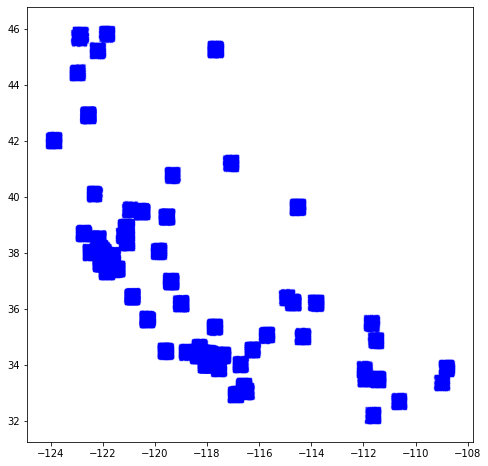

In [17]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize = (8, 8))
plt.scatter(coordinates[:,1], coordinates[:,0], s = 7, c = "blue", marker = "X", alpha = 0.25, linewidths = 1)
plt.show()